In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
print('Versão da OpenCV: ', cv2.__version__, end='\n\n')

Versão da OpenCV:  3.4.3



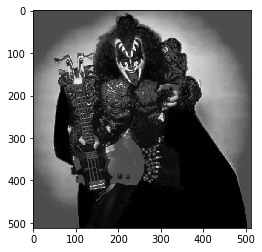

In [55]:
img = cv2.imread('/content/ed7a20a362adb57310f4bec8fcd28720.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [56]:
img.shape

(512, 512)

In [0]:
def simple_subsampling(img, n):
  lista_imagens = []
  for i in range(n+1):
    img = img[1::2, 1::2]
    lista_imagens.append(img)
        
  return lista_imagens   

In [0]:
lista_imagens = simple_subsampling(img, 4)

In [59]:
lista_imagens[3].shape

(32, 32)

<Figure size 600x400 with 0 Axes>

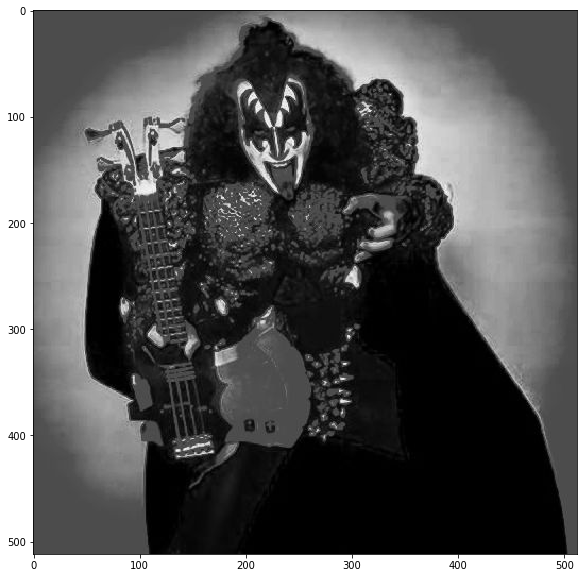

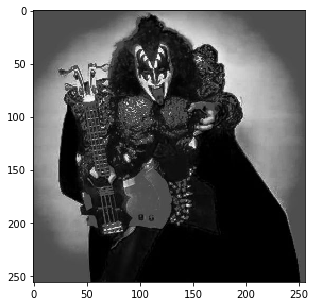

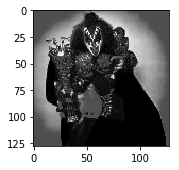

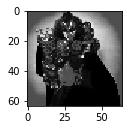

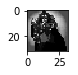

In [60]:
plt.figure(dpi=100)
plt.gray()
plt.subplots(figsize=(20, 10))
plt.imshow(img)
plt.subplots(figsize=(10, 5))
plt.imshow(lista_imagens[0])
plt.subplots(figsize=(5, 2.5))
plt.imshow(lista_imagens[1])
plt.subplots(figsize=(2.5, 1.75))
plt.imshow(lista_imagens[2])
plt.subplots(figsize=(1.5, 0.75))
plt.imshow(lista_imagens[3])
plt.show()

https://gist.github.com/KeremTurgutlu/68feb119c9dd148285be2e247267a203

In [0]:
def nn_interpolate(A, new_size):
    """Vectorized Nearest Neighbor Interpolation"""

    old_size = A.shape
    row_ratio, col_ratio = np.array(new_size)/np.array(old_size)

    # row wise interpolation 
    row_idx = (np.ceil(range(1, 1 + int(old_size[0]*row_ratio))/row_ratio) - 1).astype(int)

    # column wise interpolation
    col_idx = (np.ceil(range(1, 1 + int(old_size[1]*col_ratio))/col_ratio) - 1).astype(int)

    final_matrix = A[:, row_idx][col_idx, :]

    return final_matrix


In [0]:
teste = nn_interpolate(lista_imagens[0], 512)

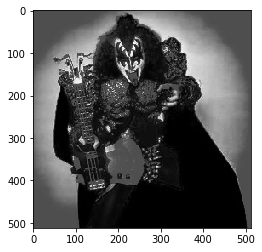

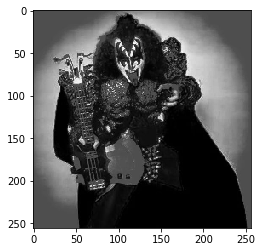

In [63]:
plt.figure()
plt.imshow(teste)
plt.show()
plt.imsave('fig1tets.png', teste)
plt.imshow(lista_imagens[0])
# plt.show()
# plt.savefig('fig2teste.png', lista_imagens[0])

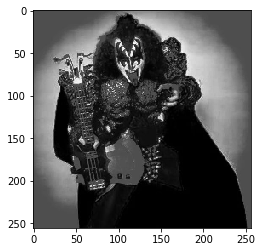

In [64]:
teste1 = lista_imagens[0]
plt.figure()
plt.imshow(teste1)
plt.show()
plt.imsave('fig2tets.png', teste1)


In [65]:
teste1.shape

(256, 256)

In [0]:
import numpy as np
from scipy import ndimage
 
def GetBilinearPixel(imArr, posX, posY):
	out = []
 
	#Get integer and fractional parts of numbers
	modXi = int(posX)
	modYi = int(posY)
	modXf = posX - modXi
	modYf = posY - modYi
	modXiPlusOneLim = min(modXi+1,imArr.shape[1]-1)
	modYiPlusOneLim = min(modYi+1,imArr.shape[0]-1)
 
	#Get pixels in four corners
	# for chan in range(imArr.shape[2]):
	bl = imArr[modYi, modXi, 1]
	br = imArr[modYi, modXiPlusOneLim, 1]
	tl = imArr[modYiPlusOneLim, modXi, 1]
	tr = imArr[modYiPlusOneLim, modXiPlusOneLim, 1]
 
	#Calculate interpolation
	b = modXf * br + (1. - modXf) * bl
	t = modXf * tr + (1. - modXf) * tl
	pxf = modYf * t + (1. - modYf) * b
	out.append(int(pxf+0.5))
 
	return out

In [0]:
# Bilinear interpolation
def bilinear_interpolate(image):
  image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
  (h, w, channels) = image.shape
  
  h2 = 512
  w2 = 512
  temp = np.zeros((h2, w2, 3), np.uint8)
  x_ratio = float((w - 1)) / w2;
  y_ratio = float((h - 1)) / h2;
  for i in range(1, h2 - 1):
    for j in range(1 ,w2 - 1):
      x = int(x_ratio * j)
      y = int(y_ratio * i)
      x_diff = (x_ratio * j) - x
      y_diff = (y_ratio * i) - y
      a = image[x, y] & 0xFF
      b = image[x + 1, y] & 0xFF
      c = image[x, y + 1] & 0xFF
      d = image[x + 1, y + 1] & 0xFF
      blue = a[0] * (1 - x_diff) * (1 - y_diff) + b[0] * (x_diff) * (1-y_diff) + c[0] * y_diff * (1 - x_diff)   + d[0] * (x_diff * y_diff)
      green = a[1] * (1 - x_diff) * (1 - y_diff) + b[1] * (x_diff) * (1-y_diff) + c[1] * y_diff * (1 - x_diff)   + d[1] * (x_diff * y_diff)
      red = a[2] * (1 - x_diff) * (1 - y_diff) + b[2] * (x_diff) * (1-y_diff) + c[2] * y_diff * (1 - x_diff)   + d[2] * (x_diff * y_diff)
      temp[j, i] = (blue, green, red)

  return cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
			

In [0]:
testep = bilinear_interpolate(img)

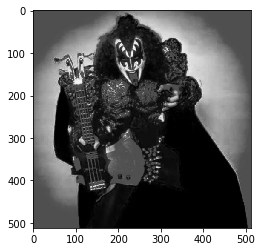

In [84]:
# gray = cv2.cvtColor(testep, cv2.COLOR_BGR2GRAY)
plt.imshow(testep)

In [0]:
testem = cv2.cvtColor(testep, cv2.IMREAD_GRAYSCALE).shape

In [72]:
gray.shape

(512, 512)

In [74]:
img.shape

(512, 512)

In [75]:
img = cv2.imread('/content/ed7a20a362adb57310f4bec8fcd28720.jpg', cv2.IMREAD_GRAYSCALE)
print(img.shape)

(512, 512)


(1920, 1597)
[7 7 7 ... 7 7 7]
(1920, 1597)
Program successfully terminated


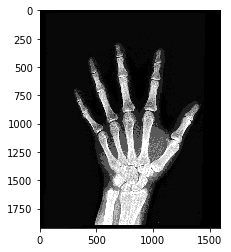

In [76]:
from pylab import imread,imshow,figure,show,subplot
from numpy import reshape,uint8,flipud
from sklearn.cluster import MiniBatchKMeans

image = imread('/content/xray.jpg')

print(image.shape)
# Extract width & height of image
(HEIGHT, WIDTH) = image.shape[:2]

# Convert image to L, A, B color space
# image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Reshape the image to a feature vector
image = image.reshape((image.shape[0] * image.shape[1], 1))

# Apply MiniBatchKMeans and then create the quantized image based on the predictions
clt = MiniBatchKMeans(n_clusters = 8)
labels = clt.fit_predict(image)
print(labels)
quant = clt.cluster_centers_.astype("uint8")[labels]

# reshape the feature vectors to images
quant = quant.reshape((HEIGHT, WIDTH))
image = image.reshape((HEIGHT, WIDTH))

# convert from L, A, B to RGB
# quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
# image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
# quant = cv2.cvtColor(quant, cv2.COLOR_BGR2GRAY)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# print(type(quant))
# print(type(image))
# Display images
print(quant.shape)
plt.imshow(image)
plt.gray()
plt.imshow(quant)

cv2.waitKey(0)
print("Program successfully terminated")

In [8]:
img

array([[[254,   0,   0],
        [254,   0,   0],
        [254,   0,   0],
        ...,
        [254,   0,   0],
        [254,   0,   0],
        [254,   0,   0]],

       [[254,   0,   0],
        [254,   0,   0],
        [254,   0,   0],
        ...,
        [254,   0,   0],
        [254,   0,   0],
        [254,   0,   0]],

       [[254,   0,   0],
        [254,   0,   0],
        [254,   0,   0],
        ...,
        [254,   0,   0],
        [254,   0,   0],
        [254,   0,   0]],

       ...,

       [[254,   0,   0],
        [254,   0,   0],
        [254,   0,   0],
        ...,
        [254,   0,   7],
        [254,   0,   0],
        [240,   9,   0]],

       [[254,   0,   0],
        [254,   0,   0],
        [254,   0,   0],
        ...,
        [254,   0,   7],
        [254,   0,   0],
        [239,   9,   0]],

       [[254,   0,   0],
        [254,   0,   0],
        [254,   0,   0],
        ...,
        [254,   0,   7],
        [254,   0,   0],
        [239,   9,   0]]